In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
md = pd.read_csv(mouse_drug_data_to_load)
md.head()
ct = pd.read_csv(clinical_trial_data_to_load)
ct.head()
# Combine the data into a single dataset

combined = pd.merge(ct,md,how ="left", on = "Mouse ID")
# Display the data table for preview

combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
del combined["Metastatic Sites"]

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grpd=combined.groupby(["Drug","Timepoint"])
df2 = grpd.mean()

# Convert to DataFrame

grpmdf = pd.DataFrame(df2).reset_index()
# Preview DataFrame
grpmdf

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grpd1=combined.groupby(["Drug","Timepoint"])
df3 = grpd1.sem()

# Convert to DataFrame
grpmdf1 = pd.DataFrame(df3).reset_index()
# Preview DataFrame
del grpmdf1["Mouse ID"]
grpmdf1.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
grpmdfT = grpmdf.pivot_table('Tumor Volume (mm3)','Timepoint',["Drug"])

# Preview that Reformatting worked
grpmdfT

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


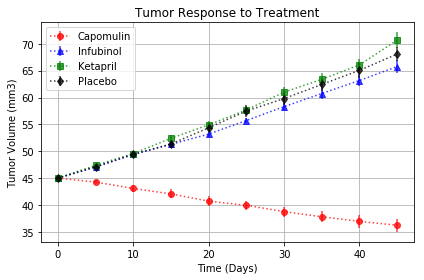

In [5]:
x= np.arange(0,50,5)
Capomulin= grpmdfT.iloc[:,0]
Infubinol= grpmdfT.iloc[:,2]
Ketapril= grpmdfT.iloc[:,3]
Placebo= grpmdfT.iloc[:,5]

grpmdfT1 = grpmdf1.pivot_table('Tumor Volume (mm3)','Timepoint',["Drug"])


e1 = grpmdfT1.iloc[:,0]
e2 = grpmdfT1.iloc[:,2]
e3 = grpmdfT1.iloc[:,3]
e4 = grpmdfT1.iloc[:,5]

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()


ax.errorbar(x,Capomulin,yerr=e1,fmt="o", color="red",alpha=0.75, label="Capomulin",linestyle='dotted')
ax.errorbar(x,Infubinol,yerr=e2, fmt="^", color="blue",alpha=0.75, label="Infubinol",linestyle='dotted')
ax.errorbar(x,Ketapril,yerr=e3, fmt="s", color="green",alpha=0.75, label="Ketapril",linestyle='dotted')
ax.errorbar(x,Placebo,yerr=e4, fmt="d", color="black",alpha=0.75, label="Placebo",linestyle='dotted')


plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc = "best",fancybox = True)
plt.grid()
plt.tight_layout()

# Save the Figure

plt.savefig("Graphs/TumorResponseToTreatment.png")

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined1 = pd.merge(ct,md,how ="left", on = "Mouse ID")

Met = combined1.groupby(["Drug","Timepoint"])

mnmet = Met["Metastatic Sites"].mean()

mnmet
# Convert to DataFrame
metdf = pd.DataFrame(mnmet).reset_index()

# Preview DataFrame
metdf.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semmet = Met["Metastatic Sites"].sem()
# Convert to DataFrame
metdf1 = pd.DataFrame(semmet ).reset_index()
# Preview DataFrame
metdf1.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
metpvt = metdf.pivot_table('Metastatic Sites','Timepoint',["Drug"])
# Preview that Reformatting worked
metpvt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


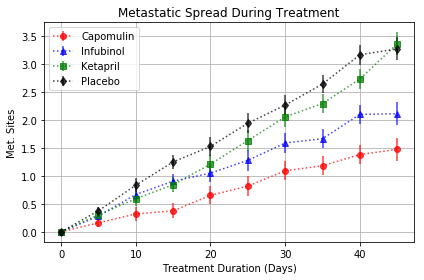

In [10]:
# Generate the Plot (with Error Bars)
xmt= np.arange(0,50,5)
Capomulinmt= metpvt.iloc[:,0]
Infubinolmt= metpvt.iloc[:,2]
Ketaprilmt= metpvt.iloc[:,3]
Placebomt= metpvt.iloc[:,5]

metpvt1 = metdf1.pivot_table('Metastatic Sites','Timepoint',["Drug"])
er1 = metpvt1.iloc[:,0]
er2 = metpvt1.iloc[:,2]
er3 = metpvt1.iloc[:,3]
er4 = metpvt1.iloc[:,5]

fig1, ax1 = plt.subplots()
ax1.errorbar(x,Capomulinmt,yerr = er1,fmt="o", color="red",alpha=0.75, label="Capomulin",linestyle='dotted')
ax1.errorbar(x,Infubinolmt,yerr = er1,fmt="^", color="blue",alpha=0.75, label="Infubinol",linestyle='dotted')
ax1.errorbar(x,Ketaprilmt,yerr = er1,fmt="s", color="green",alpha=0.75, label="Ketapril",linestyle='dotted')
ax1.errorbar(x,Placebomt,yerr = er1,fmt="d", color="black",alpha=0.75, label="Placebo",linestyle='dotted')


plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc = "best",fancybox = True)
plt.grid()
plt.tight_layout()

# Save the Figure
plt.savefig("Graphs/MetastaticSpreadDuringTreatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mc = combined1.groupby(["Drug","Timepoint"])
countmc = mc["Mouse ID"].count()
# Convert to DataFrame
mcdf = pd.DataFrame(countmc).reset_index()
mcdf = mcdf.rename(columns = {'Mouse ID':'Mouse Count'})
# Preview DataFrame
mcdf.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mcpvt = mcdf.pivot_table("Mouse Count","Timepoint",["Drug"])
# Preview the Data Frame
mcpvt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


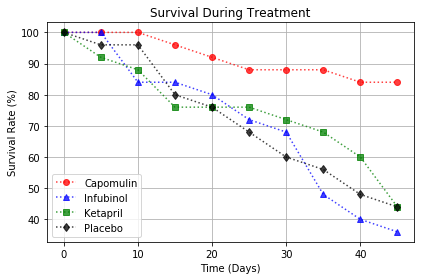

In [13]:
# Generate the Plot (Accounting for percentages)
mcpvt1 = mcpvt/25*100
mcpvt1

mcx= [np.arange(0,50,5)]
Capomulinm= mcpvt1.iloc[:,0]
Infubinolm= mcpvt1.iloc[:,2]
Ketaprilm= mcpvt1.iloc[:,3]
Placebom= mcpvt1.iloc[:,5]


fig2, ax1 = plt.subplots()
ax1.errorbar(x,Capomulinm,fmt="o", color="red",alpha=0.75, label="Capomulin",linestyle='dotted')
ax1.errorbar(x,Infubinolm,fmt="^", color="blue",alpha=0.75, label="Infubinol",linestyle='dotted')
ax1.errorbar(x,Ketaprilm,fmt="s", color="green",alpha=0.75, label="Ketapril",linestyle='dotted')
ax1.errorbar(x,Placebom,fmt="d", color="black",alpha=0.75, label="Placebo",linestyle='dotted')


plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc = "best",fancybox = True)
plt.grid()
plt.tight_layout()

# Save the Figure
plt.savefig("Graphs/SurvivalRate.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
perc_change = []
for cnt in range(0,len(grpmdfT)):
    temp = round((grpmdfT.iloc[9,cnt]- grpmdfT.iloc[0,cnt])/grpmdfT.iloc[0,cnt]*100,6)
    perc_change.append( temp)
perc_change

drug_names = list(grpmdfT)

for k in range(0,10):
    print(drug_names[k] + "    " + str(perc_change[k]))

Capomulin    -19.475303
Ceftamin    42.516492
Infubinol    46.123472
Ketapril    57.028795
Naftisol    53.923347
Placebo    51.29796
Propriva    47.241175
Ramicane    -22.3209
Stelasyn    52.085134
Zoniferol    46.579751


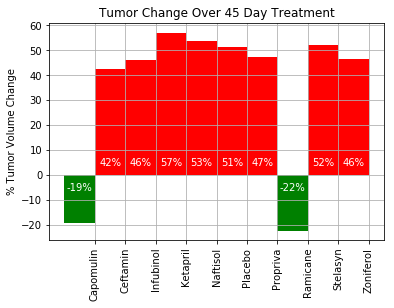

In [15]:
# Store all Relevant Percent Changes into a Tuple
percentchangeTuple = tuple(perc_change)
# a= np.array(percentchangeTuple)
# b= a[a<0]
# b
# Splice the data between passing and failing drugs
passing_drugs = []
failing_drugs = []
labelf = []
labelp = []
for count1 in range(0,10):
    if  perc_change[count1]>0:
        failing_drugs.append(perc_change[count1])
        labelf.append(count1)
    else:
        passing_drugs.append(perc_change[count1])
        labelp.append(count1)

fig, ax = plt.subplots()        
rect1 = ax.bar(labelp,passing_drugs,color = 'green',width = 1,align = "center")
rect2 = ax.bar(labelf,failing_drugs,color = 'red',width = 1,align = "center")

# Orient widths. Add labels, tick marks, etc. 

ticklocations = [q+.5 for q in np.arange(0,10,1)]
plt.xticks(ticklocations,drug_names,rotation = 'vertical')
plt.ylabel("% Tumor Volume Change")

plt.title("Tumor Change Over 45 Day Treatment")
ax.grid()

# Use functions to label the percentages of changes

def autolabel(rects, ax):
    

    for rect in rects:
        height = rect.get_height()
                
        if height > 0:
            label_position = 3
        else:            
            label_position = -7
            
        s=int(height)
        v = str(s)+'%'
        ax.text(rect.get_x() + rect.get_width()/2., label_position,v,   ha='center', va='bottom', color = 'white')  
               

# Call functions to implement the function calls

autolabel(rect2, ax)
autolabel(rect1, ax)

# Save the Figure
plt.savefig("Graphs/SummaryBar.png")

# Show the Figure
fig.show()
